# 19 - Exploring Well Log Data using the Welly Python Library

The welly library was developed by Agile Geoscience to help with loading, processing and analysing well log data from a single well or multiple wells. The library allows exploration of the meta data found within the headers of las files and also contains a plotting function to display a typical well log. Additionally, the welly library contains tools for identifying and handling data quality issues.

The Welly library can be found at the Agile Geoscience GitHub at https://github.com/agile-geoscience/welly

In this short tutorial we will see how to load a well from the Volve field and exploring some of the functionality available within this library.

## The Dataset

The dataset we are using comes from the publicly available Equinor Volve Field dataset released in 2018. The file used in this tutorial is from well 15/19-F1B. 

Details on the Volve Dataset can be found [here](https://www.equinor.com/en/what-we-do/norwegian-continental-shelf-platforms/volve.html)

## Importing Libraries and Data
The first step in this tutorial will be to load in the required modules, Well and Curve, from the Welly libray. These modules are used to work with well log data and with individual curves.

In [1]:
from welly import Well
from welly import Curve

import matplotlib.pyplot as plt

Our LAS file can be loaded in using the `Well.from_las()` method. This will create a new well object.

In [2]:
well = Well.from_las('Data/15_19_F1B_WLC_PETRO_COMPUTED_INPUT_1.LAS')

/Users/andy/opt/anaconda3/lib/python3.8/site-packages/welly/well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


# Data Exploration
## File and Well Information
Now that our data has been loaded in we can begin exploring the contents and meta data for the selected well. 
If we call upon our `well` object we will be presented with a summary table which contains the wellname, location, co-ordinates, and a list of curve mnemonics.

In [3]:
well

Well(uwi: '', 22 curves: ['ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT'])

We can also call upon specific functions to access the required information. 

The first is the `header` which will return key header information, including the well name, Unique Well Identifier (UWI), the field name and company name. 

In [4]:
well.header

{'name': '15/9-F-1 B', 'uwi': '', 'field': 'VOLVE', 'company': 'Statoil Petroleum'}

Let's now have a look at the location information for this well. To do so we can call upon the `.location` method for our data object.

In [5]:
well.location

Location({'position': None, 'crs': CRS({}), 'location': 'Maersk Inspirer', 'country': '', 'province': '', 'county': '', 'latitude': '058 26\' 29.907" N    DMS', 'longitude': '001 53\' 14.708" E    DMS', 'api': '', 'td': None, 'deviation': None})

This returns a location object in the form of a dictionary. The file we are using does not contain much information about the location of the well, but we do have information about the latitude and longitude. These can be extracted by appending `.latitude` and `.longitude` to the location method and put into an easier to read format.

Using the print function for these methods provides a nicer output to read.

In [6]:
lati = well.location.latitude
long = well.location.longitude

print(lati)
print(long)

058 26' 29.907" N    DMS
001 53' 14.708" E    DMS


## Exploring the Data

We saw in the previous section when looking at the well header that we had a number of curves. We can get an idea of how many by calling up on the `count_curves()` function.

In [7]:
well.count_curves()

22

This returns a total count of 22 curves.

We can also obtain a list of the curve menmonics within the las file using the method `_get_curve_menmonics()`.

In [8]:
well._get_curve_mnemonics()

['ABDCQF01',
 'ABDCQF02',
 'ABDCQF03',
 'ABDCQF04',
 'BS',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'NBGRCFM',
 'NPHI',
 'PEF',
 'RACEHM',
 'RACELM',
 'RD',
 'RHOB',
 'RM',
 'ROP',
 'RPCEHM',
 'RPCELM',
 'RT']

Another way to view all of the curves is by calling upon `.data`. This returns a dictionary object containing the well name, along with the first 3 and the last 3 values for that curve.

As seen in the example below, many of the first and last values are listed as nan, which stands for Not a Number.

In [9]:
well.data

{'ABDCQF01': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ABDCQF02': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ABDCQF03': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ABDCQF04': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'BS': Curve([36. , 36. , 36. , ...,  8.5,  8.5,  8.5]),
 'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DRHO': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NBGRCFM': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NPHI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PEF': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RACEHM': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RACELM': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RD': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RHOB': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RM': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ROP': Curve([    nan,     n

We can delve a little deeper into each of the curves within the las file by passing in the name of the curve like so:

In [10]:
well.data['GR']

Curve([nan, nan, nan, ..., nan, nan, nan])

This provides us with some summary statistics of the curve, such as:
- what the null value is
- the curve units
- the curve data range
- the step value of the data
- the total number of samples
- the total number of missing values (NaNs)
- Min, Max and Mean of the curve
- Curve description
- A list of the first 3 and last 3 values



# Data QC
Checking the quality of well log data is an important part of the petrophysics workflow. 

The borehole environment can be a hostile place with high temperatures, high pressures, irregular borehole shapes etc all of which can have an impact on the logging measurements. This can result in numerous issues such as missing values, outliers, constant values and erroneous values.

The welly library comes with a number of quality control checks which will allow us to check all of the data or specific curves for issues.

The quality control checks include:
- Checking for gaps / missing values : `.no_nans(curve)`
- Checking if the entire curve is empty or not : `.not_empty(curve)`
- Checking if the curve contains constant values : `.no_flat(curve)`
- Checking units: `check_units(list_of_units)`
- Checking if values are all positive : `all_positive(curve)`
- Checking if curve is within a range : `all_between(min_value, max_value)`

The full list of methods can be found within the Welly help documents at: https://welly.readthedocs.io

Before we start we will need to import the quality module like so:

In [11]:
import welly.quality as wq

Before we run any quality checks we first need to create a list of what tests we want to run and on what data we want to run those tests.

To do this we can build up a dictionary, with the key being the curve(s) we want to run the checks on. If want to run it on all of the curves we need to use the key `Each`.

For every curve we will check if there are any flatline values, any gaps and making sure the curve is not empty.
For the gamma ray (GR) and bulk density (RHOB) curves we are going to check that all of the values are positive, that they are between standard ranges and that the units are what we expect them to be.

In [12]:
tests = {'Each': [wq.no_flat,
                 wq.no_gaps,
                 wq.not_empty],
        'GR': [
                wq.all_positive,
                wq.all_between(0, 250),
                wq.check_units(['API', 'GAPI']),
        ],
        'RHOB': [
                wq.all_positive,
                wq.all_between(1.5, 3),
                wq.check_units(['G/CC', 'g/cm3']),
        ]}

We could run the tests as they are, however, the output is not easy to read. To make easier and nicer, we will using the HTML function from IPython.display to make a pretty table.

Once the module is imported we can create a variable called `data_qc_table` to store the information in. Assigned to this variable will be `data.qc_table_html(tests)` which generates the table from the `tests` dictionary we created above.

In [14]:
from IPython.display import HTML
data_qc_table = well.qc_table_html(tests)
HTML(data_qc_table)

Curve,Passed,Score,all_positive,all_between,not_empty,no_flat,no_gaps,check_units
ABDCQF01,3 / 3,1.000,,,True,True,True,
ABDCQF02,3 / 3,1.000,,,True,True,True,
ABDCQF03,3 / 3,1.000,,,True,True,True,
ABDCQF04,3 / 3,1.000,,,True,True,True,
BS,2 / 3,0.667,,,True,False,True,
CALI,3 / 3,1.000,,,True,True,True,
DRHO,3 / 3,1.000,,,True,True,True,
DT,3 / 3,1.000,,,True,True,True,
DTS,2 / 3,0.667,,,True,True,False,
GR,4 / 6,0.667,True,False,True,True,False,True


After running the tests we can see that we have a coloured HTML table returned. Anything highlighted in green is True and anything in red is False.

From the table we can see that the BS (BitSize) curve failed on one of the three tests. Under the `no_flat` column we have a False value flagged which suggests that this curve contains constant/flat values. This has been correctly flagged as the bitsize curve measures the drill bit diameter, which will be constant for a given run or series of runs.

We can also see that a number of curves have been flagged as containing gaps.

The tests that were run just for GR and RHOB can also be seen in the table. When we run specific tests on specific curves, the remainder of the the results will be greyed out.

We can run another test to identify the fraction of the data that is not nan. For this we setup a new test and apply to all curves using `Each`.

In [15]:
tests_nans = {'Each': [wq.fraction_not_nans]}

data_nans_qc_table = well.qc_table_html(tests_nans)
HTML(data_nans_qc_table)

Curve,Passed,Score,fraction_not_nans
ABDCQF01,0.09719502274713021 / 1,0.097,0.09719502274713021
ABDCQF02,0.09719502274713021 / 1,0.097,0.09719502274713021
ABDCQF03,0.09719502274713021 / 1,0.097,0.09719502274713021
ABDCQF04,0.09719502274713021 / 1,0.097,0.09719502274713021
BS,1.0 / 1,1.000,1.0
CALI,0.10602271700159682 / 1,0.106,0.10602271700159682
DRHO,0.1062336175469254 / 1,0.106,0.1062336175469254
DT,0.12840830345575605 / 1,0.128,0.12840830345575605
DTS,0.1147600253080654 / 1,0.115,0.1147600253080654
GR,0.9791208460124733 / 1,0.979,0.9791208460124733


Once we run these tests we are presented with a table similar to the one above. In the last column we have the total fraction of values for each curve this is not a nan. These values are in decimal, with a value of 1.0 representing 100% completeness. The Score column contains a rounded version of this number.

We can write a short loop and print the percentage values out for each curve. This provides a cleaner table to get an idea of missing data percentage for each curve.

In [16]:
print((f'Curve \t % Complete').expandtabs(10))
print((f'----- \t ----------').expandtabs(10))

for k,v in well.qc_data(tests_nans).items():
    
    for i,j in v.items():
        values = round(j*100, 2)
    print((f'{k} \t {values}%').expandtabs(10))


Curve      % Complete
-----      ----------
ABDCQF01   9.72%
ABDCQF02   9.72%
ABDCQF03   9.72%
ABDCQF04   9.72%
BS         100.0%
CALI       10.6%
DRHO       10.62%
DT         12.84%
DTS        11.48%
GR         97.91%
NBGRCFM    39.73%
NPHI       10.28%
PEF        10.37%
RACEHM     25.72%
RACELM     25.72%
RD         96.14%
RHOB       10.37%
RM         96.14%
ROP        97.57%
RPCEHM     25.72%
RPCELM     25.72%
RT         25.72%


From the results we can see that a number of curves have a high percentage of missing values. This could be attributable to some of the measurements not starting until deeper in the well. We will be able to determine this in the next section with plots.

# Data Plotting
Visualising well log data is at the heart of petrophysics, with log plots being one of the most common display formats.
The welly library allows fast and easy generation of well log plots. 

First we generate a list of data that we want to display in each track. If we want to display more than one curve in a track we can embed another list e.g. `['MD', ['DT', 'DTS']]`. The curves within the inner list will be plotted on the same track and on the same scale.

Next, we can call upon the plot function and pass in the tracks list.


/Users/andy/opt/anaconda3/lib/python3.8/site-packages/welly/well.py:592: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


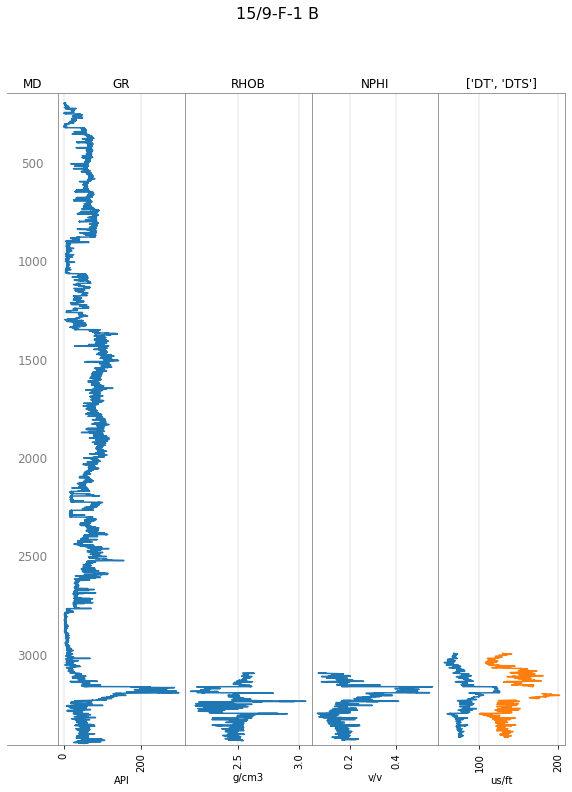

In [17]:
tracks = ['MD', 'GR', 'RHOB', 'NPHI', ['DT', 'DTS']]
well.plot(tracks=tracks)

As discussed in the data quality section, our assumption that some of the logging curves do not extend all the way to the top of the well. This is very common practice and avoids the need for and the cost of running tools from the top of the well to the bottom.

Let's zoom in a little bit closer on the lower interval. To do this we can use a regular matplotlib function to set the y-axis limits. Note that we do need to reverse the numbers so that the deeper value is first, and the shallower one second.

/Users/andy/opt/anaconda3/lib/python3.8/site-packages/welly/well.py:592: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(3500.0, 3000.0)

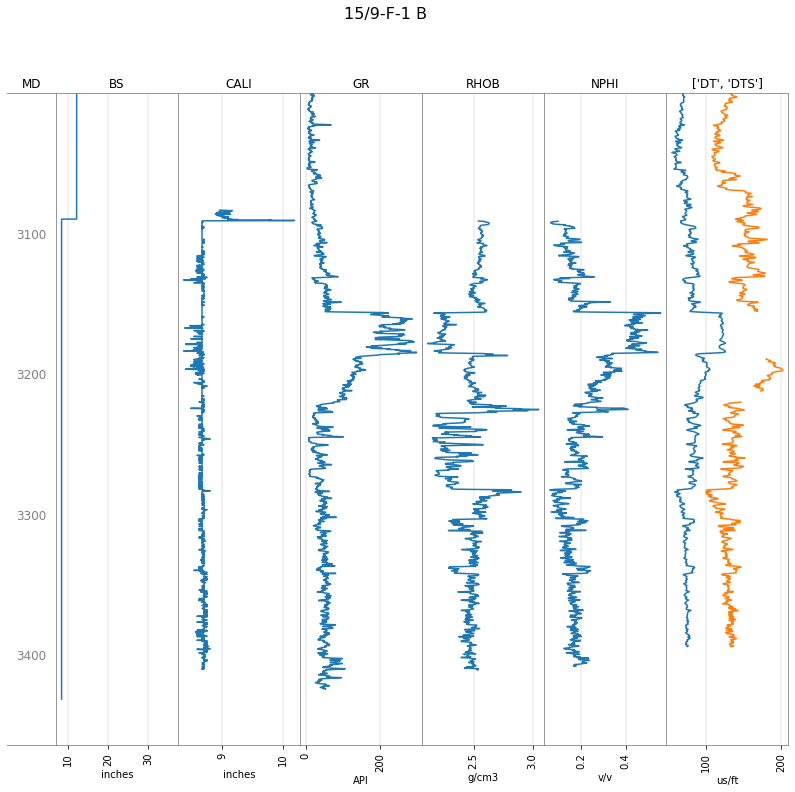

In [18]:
tracks = ['MD', 'BS', 'CALI', 'GR', 'RHOB', 'NPHI', ['DT', 'DTS']]
well.plot(tracks=tracks)
plt.ylim(3500, 3000)

We can see from the result that we now have a nice looking plot with very little effort.

However, the control over the plot appearance is limited with the current implementation not allowing granular control over the plot such as colours, scales and displaying curves with reversed scales (e.g. Neutron & Density curves).

# Well Log Data to Pandas Dataframe
In this final section, we will look at exporting the well log data from welly to pandas. Pandas is one of the most popular libraries for storing, analysing and manipulating data.

The conversion is a simple process and can be achieved by calling `.df()` on our well object.

In [19]:
df = well.df()

We can confirm the data has been converted by calling upon the `.describe()` method from pandas to view the summary statistics of the data.

In [20]:
df.describe()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
count,3226.000000,3226.000000,3226.000000,3226.000000,33191.000000,3519.000000,3526.000000,4262.000000,3809.000000,32498.000000,...,3441.000000,8538.000000,8538.000000,31910.000000,3441.000000,31910.000000,32384.000000,8538.000000,8538.000000,8538.000000
mean,2.449846,2.447409,2.447272,2.449575,19.043252,8.677213,0.053590,80.380006,138.251061,56.864115,...,6.445014,3.018323,4.734460,1.561395,2.453695,1.723831,31.336181,309.841164,451.917369,309.841164
std,0.131558,0.130183,0.131161,0.132434,6.613720,0.083978,0.023488,14.698333,19.335463,35.935409,...,0.811407,13.161070,106.249416,3.081758,0.129990,5.031734,20.949779,4662.987541,5832.266415,4662.987541
min,2.104600,2.118200,2.090200,2.124700,8.500000,8.360400,-0.022500,54.928300,99.909200,0.149300,...,4.729900,-0.096500,0.072000,0.203200,2.111800,0.179400,0.385600,0.223700,0.290400,0.223700
25%,2.366375,2.359250,2.361750,2.360050,12.250000,8.663700,0.042700,71.513225,125.532800,29.481175,...,5.938300,1.098850,1.056325,0.712800,2.379200,0.752500,20.935100,1.189600,1.162925,1.189600
50%,2.479150,2.478850,2.478250,2.479650,17.500000,8.663700,0.051800,76.295350,134.408100,58.005700,...,6.352900,1.918500,1.901350,1.104200,2.482100,1.127350,29.630650,1.988200,1.920900,1.988200
75%,2.527275,2.526050,2.525200,2.526225,26.000000,8.697600,0.059600,85.365475,149.858600,79.247200,...,6.872600,3.233250,3.310950,1.544500,2.536700,1.611375,33.598275,3.630275,3.333350,3.630275
max,3.057700,3.052100,3.050500,3.086600,36.000000,10.191700,0.220600,125.982700,202.140000,297.767300,...,10.987600,1118.314100,8417.979500,96.427900,3.051700,396.637900,151.127000,97543.421900,97036.406300,97543.421900


# Summary

The welly library, developed by Agile-Geoscience is a great tool for working with and exploring well log files. In this example we have seen how to load a single las file, explore the meta information about the well and the curve contents, and display the log data on a log plot.

Welly has significant more functionality that can handle multiple well logs as well as creating synthetic siesmiograms from the well data.

You can find and explore the welly repository [here](https://github.com/agile-geoscience/welly).

***Thanks for reading!***

*If you have found this article useful, please feel free to check out my other articles looking at various aspects of Python and well log data. You can also find my code used in this article and others at [GitHub](https://github.com/andymcdgeo).*

*If you want to get in touch you can find me on [LinkedIn](https://www.linkedin.com/in/andymcdonaldgeo/) or at my [website](http://andymcdonald.scot/).*

*Interested in learning more about python and well log data or petrophysics? Follow me on [Medium](https://medium.com/@andymcdonaldgeo).*

If you have enjoyed this article or any others and want to show your appreciate you are welcome to [Buy Me a Coffee](https://www.buymeacoffee.com/andymcdonaldgeo)